In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional, SimpleRNN, GRU
from keras.utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [ ]:
number_of_samples = 50000
epochs = 100

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_attack = pd.read_csv('/content/drive/MyDrive/CS-Dataset/ids_iscx_2012_dataset-master/dataset_attack.csv', nrows = number_of_samples)

In [ ]:
data_normal = pd.read_csv('/content/drive/MyDrive/CS-Dataset/ids_iscx_2012_dataset-master/dataset_normal.csv', nrows = number_of_samples)

In [ ]:
data_normal.columns=[ 'frame.len', 'frame.protocols', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta','class']
data_attack.columns=[ 'frame.len', 'frame.protocols', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta','class']

In [ ]:
data_normal=data_normal.drop(['ip.src', 'ip.dst','frame.protocols'],axis=1)
data_attack=data_attack.drop(['ip.src', 'ip.dst','frame.protocols'],axis=1)

In [ ]:
features=[ 'frame.len', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta']

In [ ]:
X_normal= data_normal[features].values
X_attack= data_attack[features].values
Y_normal= data_normal['class']
Y_attack= data_attack['class']
X=np.concatenate((X_normal,X_attack))
Y=np.concatenate((Y_normal,Y_attack))

In [ ]:
scalar = StandardScaler(copy=True, with_mean=True, with_std=True)
scalar.fit(X)
X = scalar.transform(X)

In [ ]:
for i in range(0,len(Y)):
  if Y[i] =="attack":
    Y[i]=0
  else:
    Y[i]=1

In [ ]:
X.shape

(100000, 25)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
X_train = np.asarray(X_train).astype(np.float32)
Y_train = np.asarray(Y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
Y_test = np.asarray(Y_test).astype(np.float32)

In [ ]:
print(X_train.shape)

(80000, 25)


In [ ]:
def create_baseline():
    model = Sequential()

    model.add(Dense(64, activation = 'relu', kernel_regularizer='l2'))
    model.add(Dense(64, activation = 'relu', kernel_regularizer='l2'))
    model.add(Dense(1, activation = 'sigmoid', kernel_regularizer='l2'))

    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    return model


In [ ]:
model = create_baseline()

In [ ]:
history = model.fit(X_train, Y_train, epochs = epochs,validation_split=0.2, verbose = 1)

Epoch 1/100
2000/2000 [==============================] - 8s 3ms/step - loss: 0.5454 - accuracy: 0.8178 - val_loss: 0.4748 - val_accuracy: 0.8267
Epoch 2/100
2000/2000 [==============================] - 6s 3ms/step - loss: 0.4729 - accuracy: 0.8217 - val_loss: 0.4749 - val_accuracy: 0.8188
Epoch 3/100
2000/2000 [==============================] - 7s 3ms/step - loss: 0.4709 - accuracy: 0.8220 - val_loss: 0.4704 - val_accuracy: 0.8199
Epoch 4/100
2000/2000 [==============================] - 7s 3ms/step - loss: 0.4704 - accuracy: 0.8221 - val_loss: 0.4721 - val_accuracy: 0.8272
Epoch 5/100
2000/2000 [==============================] - 7s 3ms/step - loss: 0.4700 - accuracy: 0.8225 - val_loss: 0.4704 - val_accuracy: 0.8291
Epoch 6/100
2000/2000 [==============================] - 6s 3ms/step - loss: 0.4700 - accuracy: 0.8223 - val_loss: 0.4712 - val_accuracy: 0.8192
Epoch 7/100
2000/2000 [==============================] - 7s 3ms/step - loss: 0.4700 - accuracy: 0.8223 - val_loss: 0.4705 - val_ac

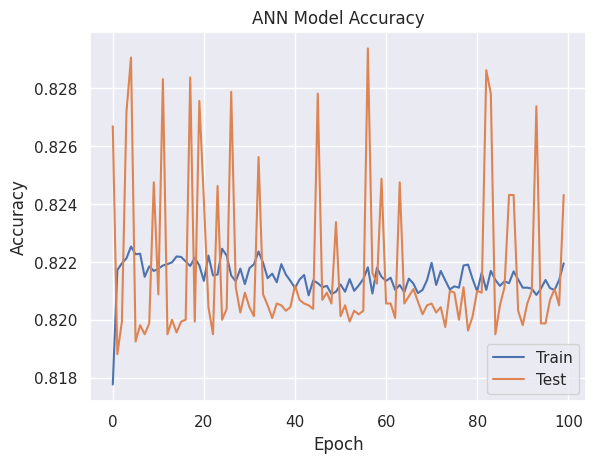

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ANN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('BRNN Model Accuracy.png')
plt.show()

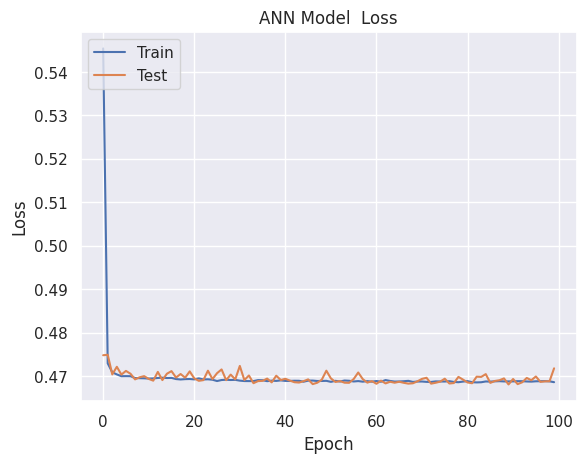

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ANN Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('BRNN Model Loss.png')
plt.show()

In [ ]:
predict = model.predict(X_test, verbose=1)

625/625 [==============================] - 1s 1ms/step


In [ ]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = predict.flatten().round()
predictn = predictn.tolist()
Y_testn = Y_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fp+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fn+=1

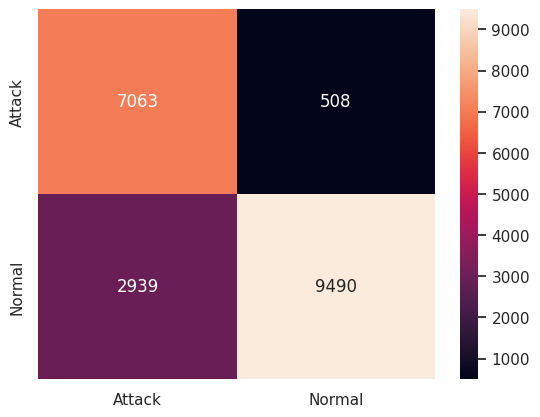

In [ ]:
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ["Attack","Normal"],columns = ["Attack","Normal"])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")

In [ ]:
figure = ax.get_figure()
figure.savefig('confusion_matrix_ANN.png', dpi=400)

In [ ]:
model.save('ann_model.h5')

In [ ]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
precision = precision_score(Y_test, predictn)
recall = recall_score(Y_test, predictn)
print("Precision: %.2f%%" % (precision*100))
print("Recall: %.2f%%" % (recall*100))

accuracy: 82.77%
Precision: 76.35%
Recall: 94.92%


In [ ]:
############ BILSTM ##############################

In [ ]:
features = len(X[0])
samples = X.shape[0]
train_len = 25
input_len = samples - train_len
I = np.zeros((samples - train_len, train_len, features))

for i in range(input_len):
    temp = np.zeros((train_len, features))
    for j in range(i, i + train_len - 1):
        temp[j-i] = X[j]
    I[i] = temp

In [ ]:
X.shape

(100000, 25)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(I, Y[25:100000], test_size = 0.2)

In [ ]:
X_train = np.asarray(X_train).astype(np.float32)
Y_train = np.asarray(Y_train).astype(np.float32)

In [ ]:
def create_bilstm():
    model = Sequential()

    model.add(Bidirectional(LSTM(64, activation='tanh', kernel_regularizer='l2')))
    model.add(Dense(128, activation = 'relu', kernel_regularizer='l2'))
    model.add(Dense(1, activation = 'sigmoid', kernel_regularizer='l2'))

    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    return model

In [ ]:
bilstm = create_bilstm()

In [ ]:
history = bilstm.fit(X_train, Y_train, epochs = epochs,validation_split=0.2, verbose = 1)

Epoch 1/100
2000/2000 [==============================] - 21s 8ms/step - loss: 0.2942 - accuracy: 0.9335 - val_loss: 0.2192 - val_accuracy: 0.9441
Epoch 2/100
2000/2000 [==============================] - 17s 8ms/step - loss: 0.1665 - accuracy: 0.9584 - val_loss: 0.1541 - val_accuracy: 0.9597
Epoch 3/100
2000/2000 [==============================] - 17s 9ms/step - loss: 0.1506 - accuracy: 0.9622 - val_loss: 0.1361 - val_accuracy: 0.9666
Epoch 4/100
2000/2000 [==============================] - 15s 8ms/step - loss: 0.1450 - accuracy: 0.9632 - val_loss: 0.1297 - val_accuracy: 0.9677
Epoch 5/100
2000/2000 [==============================] - 15s 8ms/step - loss: 0.1343 - accuracy: 0.9660 - val_loss: 0.1294 - val_accuracy: 0.9662
Epoch 6/100
2000/2000 [==============================] - 16s 8ms/step - loss: 0.1394 - accuracy: 0.9625 - val_loss: 0.1437 - val_accuracy: 0.9611
Epoch 7/100
2000/2000 [==============================] - 16s 8ms/step - loss: 0.1298 - accuracy: 0.9667 - val_loss: 0.1223 -

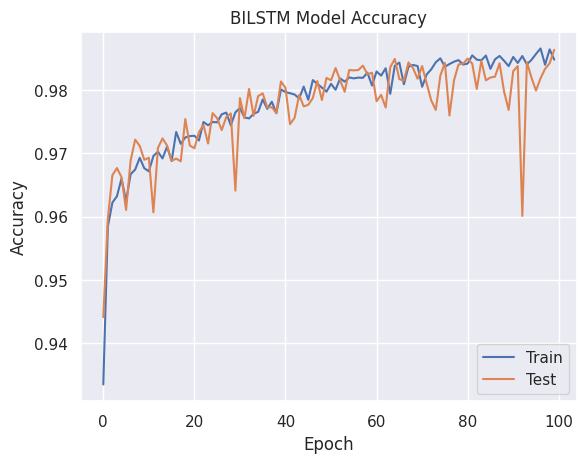

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('BILSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('BILSTM Model Accuracy.png')
plt.show()

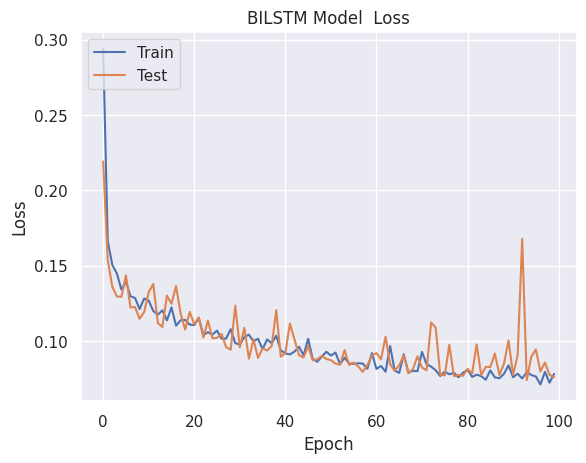

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('BILSTM Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('BILSTM Model Loss.png')
plt.show()

In [ ]:
predict = bilstm.predict(X_test, verbose=1)

625/625 [==============================] - 2s 3ms/step


In [ ]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = predict.flatten().round()
predictn = predictn.tolist()
Y_testn = Y_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fp+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fn+=1

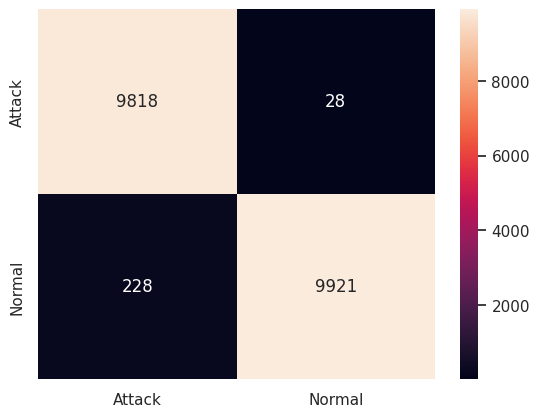

In [ ]:
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ["Attack","Normal"],columns = ["Attack","Normal"])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")

In [ ]:
figure = ax.get_figure()
figure.savefig('confusion_matrix_BILSTM.png', dpi=400)

In [ ]:
bilstm.save('BILSTM_model.h5')

In [ ]:
X_test = np.asarray(X_test).astype(np.float32)
Y_test = np.asarray(Y_test).astype(np.float32)

In [ ]:
scores = bilstm.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
precision = precision_score(Y_test, predictn)
recall = recall_score(Y_test, predictn)
print("Precision: %.2f%%" % (precision*100))
print("Recall: %.2f%%" % (recall*100))

NameError: ignored

In [ ]:
############ LSTM ##############################

In [ ]:
def create_lstm():
    model = Sequential()

    model.add(LSTM(64, activation='tanh', kernel_regularizer='l2'))
    model.add(Dense(128, activation = 'relu', kernel_regularizer='l2'))
    model.add(Dense(1, activation = 'sigmoid', kernel_regularizer='l2'))

    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    return model

In [ ]:
lstm = create_lstm()

In [ ]:
history = lstm.fit(X_train, Y_train, epochs = epochs,validation_split=0.2, verbose = 1)

Epoch 1/100
2000/2000 [==============================] - 15s 6ms/step - loss: 0.2730 - accuracy: 0.9370 - val_loss: 0.1611 - val_accuracy: 0.9633
Epoch 2/100
2000/2000 [==============================] - 12s 6ms/step - loss: 0.1736 - accuracy: 0.9584 - val_loss: 0.1924 - val_accuracy: 0.9514
Epoch 3/100
2000/2000 [==============================] - 12s 6ms/step - loss: 0.1598 - accuracy: 0.9612 - val_loss: 0.1835 - val_accuracy: 0.9466
Epoch 4/100
2000/2000 [==============================] - 11s 6ms/step - loss: 0.1549 - accuracy: 0.9625 - val_loss: 0.1500 - val_accuracy: 0.9642
Epoch 5/100
2000/2000 [==============================] - 12s 6ms/step - loss: 0.1516 - accuracy: 0.9610 - val_loss: 0.1445 - val_accuracy: 0.9587
Epoch 6/100
2000/2000 [==============================] - 12s 6ms/step - loss: 0.1330 - accuracy: 0.9675 - val_loss: 0.1178 - val_accuracy: 0.9707
Epoch 7/100
2000/2000 [==============================] - 12s 6ms/step - loss: 0.1389 - accuracy: 0.9657 - val_loss: 0.1415 -

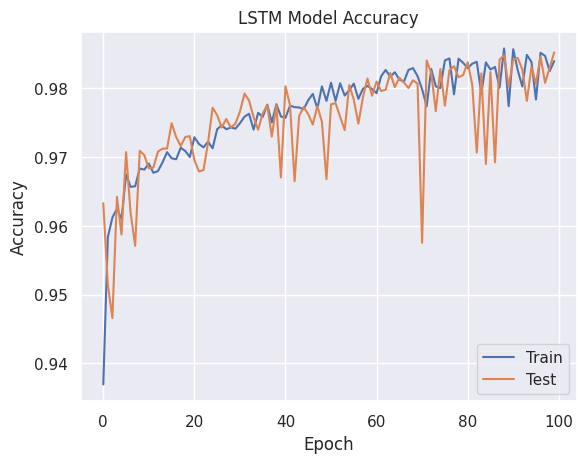

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('LSTM Model Accuracy.png')
plt.show()

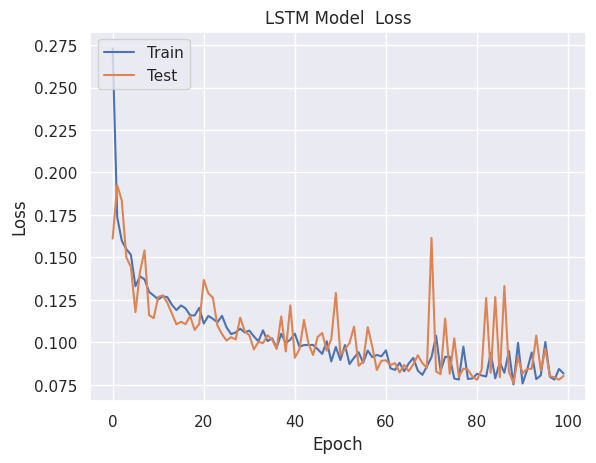

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('LSTM Model Loss.png')
plt.show()

In [ ]:
predict = lstm.predict(X_test, verbose=1)

625/625 [==============================] - 2s 2ms/step


In [ ]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = predict.flatten().round()
predictn = predictn.tolist()
Y_testn = Y_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fp+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fn+=1

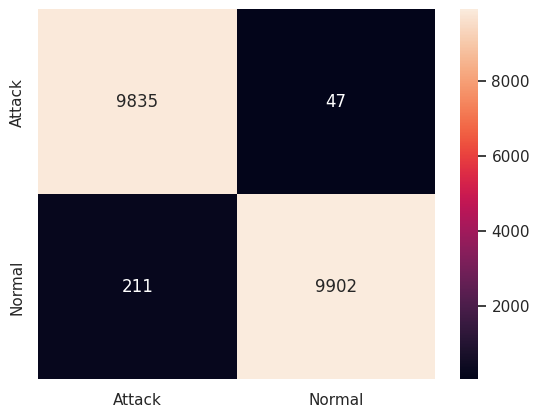

In [ ]:
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ["Attack","Normal"],columns = ["Attack","Normal"])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")

In [ ]:
figure = ax.get_figure()
figure.savefig('confusion_matrix_LSTM.png', dpi=400)

In [ ]:
lstm.save('LSTM_model.h5')

In [ ]:
scores = lstm.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
precision = precision_score(Y_test, predictn)
recall = recall_score(Y_test, predictn)
print("Precision: %.2f%%" % (precision*100))
print("Recall: %.2f%%" % (recall*100))

accuracy: 98.71%
Precision: 97.91%
Recall: 99.53%


In [ ]:
####################### RNN ###############################################

In [ ]:
def create_SimpleRNN():
    model = Sequential()

    model.add(SimpleRNN(64, activation='tanh', kernel_regularizer='l2'))
    model.add(Dense(128, activation = 'relu', kernel_regularizer='l2'))
    model.add(Dense(1, activation = 'sigmoid', kernel_regularizer='l2'))

    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    return model

In [ ]:
SimpleRNN = create_SimpleRNN()

In [ ]:
history = SimpleRNN.fit(X_train, Y_train, epochs = epochs,validation_split=0.2, verbose = 1)

Epoch 1/100
2000/2000 [==============================] - 42s 20ms/step - loss: 0.3617 - accuracy: 0.9199 - val_loss: 0.2288 - val_accuracy: 0.9430
Epoch 2/100
2000/2000 [==============================] - 39s 20ms/step - loss: 0.2223 - accuracy: 0.9440 - val_loss: 0.1943 - val_accuracy: 0.9507
Epoch 3/100
2000/2000 [==============================] - 43s 22ms/step - loss: 0.1998 - accuracy: 0.9499 - val_loss: 0.2015 - val_accuracy: 0.9556
Epoch 4/100
2000/2000 [==============================] - 40s 20ms/step - loss: 0.1839 - accuracy: 0.9546 - val_loss: 0.2362 - val_accuracy: 0.9346
Epoch 5/100
2000/2000 [==============================] - 39s 20ms/step - loss: 0.1818 - accuracy: 0.9541 - val_loss: 0.1651 - val_accuracy: 0.9624
Epoch 6/100
2000/2000 [==============================] - 39s 19ms/step - loss: 0.1771 - accuracy: 0.9559 - val_loss: 0.1825 - val_accuracy: 0.9511
Epoch 7/100
2000/2000 [==============================] - 39s 20ms/step - loss: 0.1705 - accuracy: 0.9576 - val_loss: 0

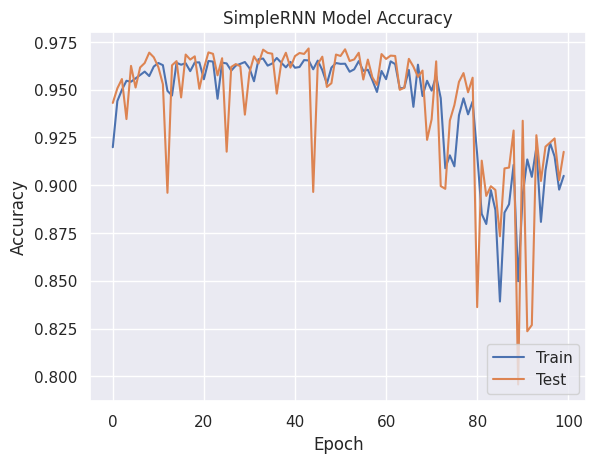

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('SimpleRNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('SimpleRNN Model Accuracy.png')
plt.show()

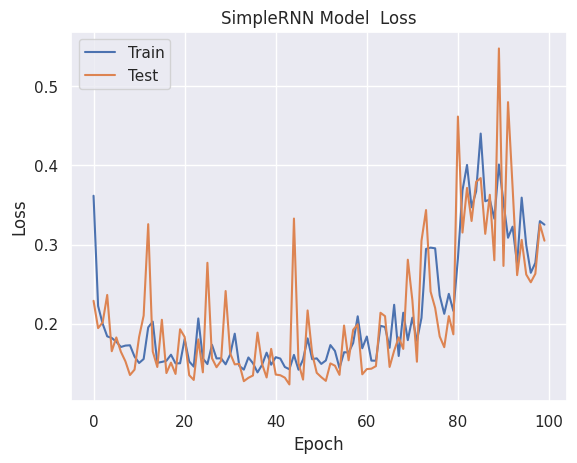

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('SimpleRNN Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('SimpleRNN Model Loss.png')
plt.show()

In [ ]:
predict = SimpleRNN.predict(X_test, verbose=1)

625/625 [==============================] - 2s 3ms/step


In [ ]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = predict.flatten().round()
predictn = predictn.tolist()
Y_testn = Y_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fp+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fn+=1

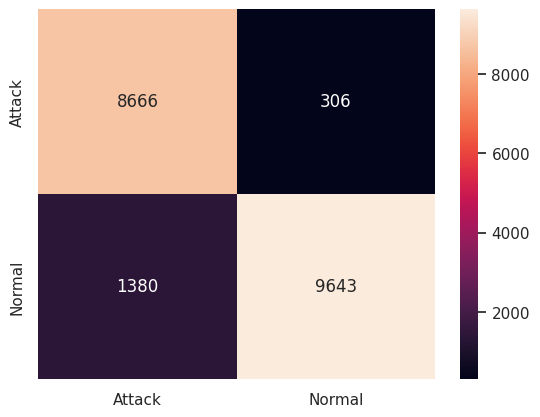

In [ ]:
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ["Attack","Normal"],columns = ["Attack","Normal"])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")

In [ ]:
figure = ax.get_figure()
figure.savefig('confusion_matrix_SimpleRNN.png', dpi=400)

In [ ]:
SimpleRNN.save('SimpleRNN_model.h5')

In [ ]:
scores = SimpleRNN.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
precision = precision_score(Y_test, predictn)
recall = recall_score(Y_test, predictn)
print("Precision: %.2f%%" % (precision*100))
print("Recall: %.2f%%" % (recall*100))

accuracy: 91.57%
Precision: 87.48%
Recall: 96.92%


In [ ]:
####################### GRU ###############################################

In [ ]:
def create_GRU():
    model = Sequential()

    model.add(GRU(64, activation='tanh', kernel_regularizer='l2'))
    model.add(Dense(128, activation = 'relu', kernel_regularizer='l2'))
    model.add(Dense(1, activation = 'sigmoid', kernel_regularizer='l2'))

    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    return model

In [ ]:
GRU = create_GRU()

In [ ]:
history = GRU.fit(X_train, Y_train, epochs = epochs,validation_split=0.2, verbose = 1)

Epoch 1/100
2000/2000 [==============================] - 18s 8ms/step - loss: 0.2662 - accuracy: 0.9420 - val_loss: 0.1903 - val_accuracy: 0.9606
Epoch 2/100
2000/2000 [==============================] - 13s 7ms/step - loss: 0.1630 - accuracy: 0.9622 - val_loss: 0.1512 - val_accuracy: 0.9684
Epoch 3/100
2000/2000 [==============================] - 13s 6ms/step - loss: 0.1501 - accuracy: 0.9643 - val_loss: 0.1318 - val_accuracy: 0.9691
Epoch 4/100
2000/2000 [==============================] - 12s 6ms/step - loss: 0.1358 - accuracy: 0.9685 - val_loss: 0.1288 - val_accuracy: 0.9688
Epoch 5/100
2000/2000 [==============================] - 12s 6ms/step - loss: 0.1269 - accuracy: 0.9706 - val_loss: 0.1226 - val_accuracy: 0.9702
Epoch 6/100
2000/2000 [==============================] - 14s 7ms/step - loss: 0.1236 - accuracy: 0.9710 - val_loss: 0.1225 - val_accuracy: 0.9709
Epoch 7/100
2000/2000 [==============================] - 12s 6ms/step - loss: 0.1186 - accuracy: 0.9719 - val_loss: 0.1542 -

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('GRU Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('GRU Model Accuracy.png')
plt.show()

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('GRU Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('GRU Model Loss.png')
plt.show()

In [ ]:
predict = GRU.predict(X_test, verbose=1)

In [ ]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = predict.flatten().round()
predictn = predictn.tolist()
Y_testn = Y_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fp+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fn+=1

In [ ]:
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ["Attack","Normal"],columns = ["Attack","Normal"])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")

In [ ]:
figure = ax.get_figure()
figure.savefig('confusion_matrix_GRU.png', dpi=400)

In [ ]:
GRU.save('GRU_model.h5')

In [ ]:
scores = GRU.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
precision = precision_score(Y_test, predictn)
recall = recall_score(Y_test, predictn)
print("Precision: %.2f%%" % (precision*100))
print("Recall: %.2f%%" % (recall*100))